<img src='senac-logo-0.webp' width=150>

<h1>Projeto - Análise de dados com Estatística Descritiva e Inferencial</h1>

<h4>Tema: PREÇO DE CASAS</h4>

Equipe:
- Antônio Nunes 
- Jonatha Weydson
- Sanderson Rhawan
- Saulo Bernardo
- Washington França
- Williams Alves 

 

1. **Objetivo da Análise**: Esta apresentação tem como objetivo explorar e identificar os fatores que afetam o preço das casas, utilizando um conjunto de dados representativo.
   
2. **Contexto**: O mercado imobiliário é dinâmico e os preços das propriedades são influenciados por uma variedade de fatores. Compreender esses fatores pode ser crucial para avaliações de mercado, investimentos e estratégias de venda.
   
3. **Conjunto de Dados**: Disponibilizamos uma coleção de 545 registros imobiliários, cuidadosamente compilados para permitir uma análise abrangente das tendências de preços.

4. **Variáveis em Estudo**: Cada registro no banco de dados detalha múltiplas características do imóvel, incluindo:

    - Área, preço (numéricos contínuos)

    - Número de quartos, banheiros, número de andares, disponibilidade de vagas de garagem (numéricos discretos) 

    - Imóveis mobiliados, semi-mobiliados e não mobiliados (categóricos nominais) 

    - Andar localizado (categórico ordinal)  

5. **Metodologia**:  

    5.1 **Abordagem de Análise**: Utilizaremos métodos estatísticos descritiva e inferencial para 	examinar a correlação entre as características dos imóveis e seus preços de mercado. 

    5.2 **Ferramentas**: Aplicações de análises de dados com o Python e bibliotecas especializadas (p.ex., Pandas, Plotly) serão utilizadas para processar os dados e criar visualizações claras e informativas. 

<h3>Bibliotecas</h3>

In [1]:
import pandas as pd
import plotly.express as px
import statsmodels.api as sm

<h3>Base de Dados</h3>

In [2]:
# Carregando base de dados
dados = pd.read_csv(
    './Base/Grupo 1 - Imobiliario - Preço de Casas.csv',
    encoding='ISO-8859-1',
    sep=';',
)

dados.head()

,Preco,Area,Quartos,Banheiros,NumAndares,EstradaPrincipal,QuartoHospedes,AquecimentoAgua,VagasGaragem,Mobilia
0,13300000,7420,4,2,3,Sim,Nao,Nao,2,Mobiliado
1,12250000,8960,4,4,4,Sim,Nao,Nao,3,Mobiliado
2,12250000,9960,3,2,2,Sim,Nao,Nao,2,Semi Mobiliado
3,12215000,7500,4,2,2,Sim,Nao,Nao,3,Mobiliado
4,11410000,7420,4,1,2,Sim,Sim,Nao,2,Mobiliado


In [3]:
# Verificando o tipo dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Preco             545 non-null    int64 
 1   Area              545 non-null    int64 
 2   Quartos           545 non-null    int64 
 3   Banheiros         545 non-null    int64 
 4   NumAndares        545 non-null    int64 
 5   EstradaPrincipal  545 non-null    object
 6   QuartoHospedes    545 non-null    object
 7   AquecimentoAgua   545 non-null    object
 8   VagasGaragem      545 non-null    int64 
 9   Mobilia           545 non-null    object
dtypes: int64(6), object(4)
memory usage: 42.7+ KB


<h2>6. Análise Estatísticas dos Dados</h2>

<h3>6.1 Métricas de medidas de posição dos preços dos imóveis</h3>

Na nossa primeira análise estatística, calculamos a média, mediana e desvio padrão dos preços dos imóveis para fornecer uma visão centralizada e compreender a dispersão e a tendência central dos valores no mercado. Essas métricas essenciais nos ajudam a sintetizar a variação dos preços e a determinar a consistência dentro do conjunto analisado de dados.

In [4]:
print('Média:', round(dados['Preco'].mean()))
print('Mediana:', round(dados['Preco'].median()))
print('Desvio Padrão:', round(dados['Preco'].std()))

Média: 4766729
Mediana: 4340000
Desvio Padrão: 1870440


<h3>6.2 Preço dos imóveis</h3>

<p>Analisemos através de um histograma. Histogramas podem ser usados para comparar a distribuição de duas ou mais variáveis ou conjuntos de dados.</p>
<p>O histograma mostra a distribuição dos preços dos imóveis, com a maior frequência de imóveis situada entre 2M e 4M, indicando que os preços tendem a ser mais acessíveis. Há uma queda acentuada na frequência de imóveis com o aumento do preço, e muito poucos estão listados acima de 8M, refletindo uma escassez de propriedades de luxo no mercado. A distribuição é assimétrica, inclinada para a esquerda, sugerindo que os preços dos imóveis são predominantemente mais baixos, com imóveis de preço elevado sendo mais raros.</p>

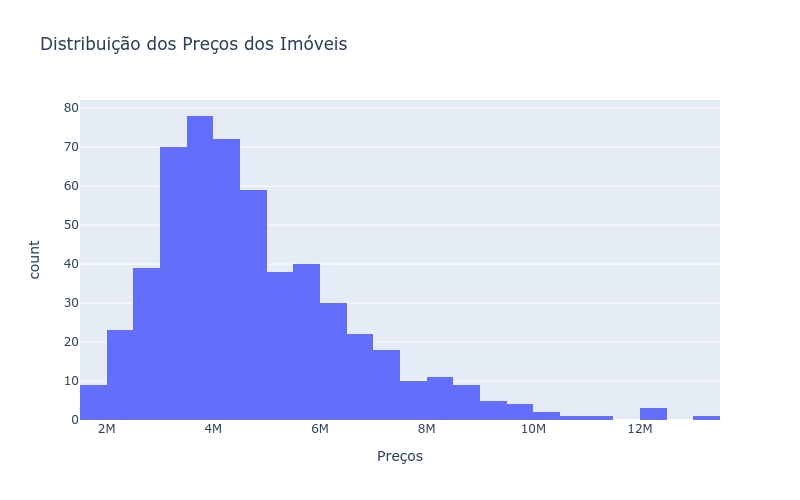

In [5]:
fig = px.histogram(
    dados,
    x='Preco',
    title='Distribuição dos Preços dos Imóveis',
    labels={'Preco': 'Preços'},
)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
)
fig.show('png')

<h3>6.3 Preço por Área</h3>
<p>Gostaríamos de verificar a relação do preço dos imóveis pela área total do imóvel. Por esta razão aplicamos aqui o gráfico de dispersão, que sugere uma relação positiva entre a área e o preço do imóvel, indicando que imóveis maiores tendem a ter preços mais altos. </p>
<p>Apesar disso, a relação não parece ser fortemente linear, pois há uma ampla dispersão dos preços em todas as faixas de área. Algumas propriedades com áreas semelhantes apresentam grande variação no preço, o que pode refletir a influência de outros fatores, como localização e outras variantes. Notamos também a presença de alguns imóveis com áreas extensas que não seguem a tendência geral, possivelmente representando exceções ou valores atípicos.</p>

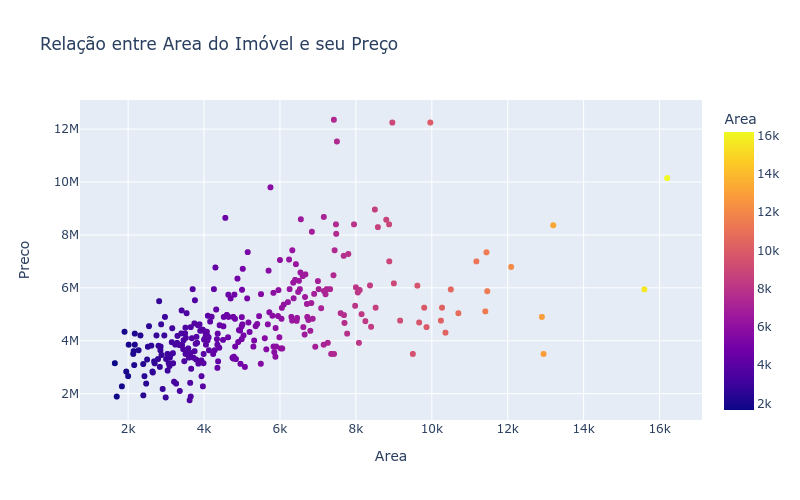

In [6]:
df = dados.groupby('Area')['Preco'].mean().reset_index()

fig = px.scatter(
    df,
    x='Area',
    y='Preco',
    title='Relação entre Area do Imóvel e seu Preço',
    color='Area',
)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
)
fig.show('png')

<h3>6.4 Preço por Localização</h3>
<p>A localização de um imóvel exerce impacto significativo em seu preço, especialmente se situado em uma rua principal, onde geralmente há maior procura e valoração devido à acessibilidade e visibilidade. Imóveis em ruas principais frequentemente comandam preços mais altos devido à conveniência e ao potencial comercial. Por outro lado, imóveis em vias secundárias podem oferecer preços mais baixos, atraindo compradores que priorizam tranquilidade ou custo-benefício. Portanto, analisemos se esta retórica é verdade em nossos dados.</p>
<p>O gráfico de barra indica que uma maioria de 59,5% dos imóveis analisados está localizada fora de estradas principais, enquanto 40,5% estão situados nas vias principais. Esta distribuição pode sugerir uma preferência por locais menos centrais, refletir um mercado com maior oferta de imóveis em áreas mais tranquilas, ou ainda, indicar uma maior escassez, em face da alta procura nas áreas centralizadas.</p>

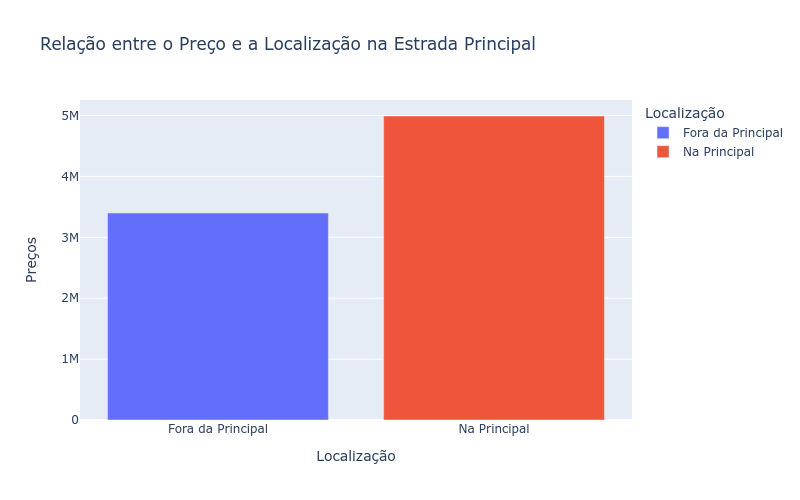

In [7]:
df = dados.groupby('EstradaPrincipal')['Preco'].mean().reset_index()
df['EstradaPrincipal'] = df['EstradaPrincipal'].replace(
    {'Nao': 'Fora da Principal', 'Sim': 'Na Principal'}
)

fig = px.bar(
    df,
    y='Preco',
    x='EstradaPrincipal',
    title='Relação entre o Preço e a Localização na Estrada Principal',
    labels={'EstradaPrincipal': 'Localização', 'Preco': 'Preços'},
    color='EstradaPrincipal',
)
fig.update_layout(
    autosize=False,
    width=800,
    height=500
)
fig.show('png')

<h3>6.5 Preço por Andar</h3>
<p>Imóveis localizados em andares mais altos frequentemente apresentam preços mais elevados, atribuídos à vista privilegiada, menor ruído e maior privacidade. A valorização progressiva por andar pode refletir também uma demanda por aspectos como segurança e status.</p>
<p>O gráfico de barras ilustra um aumento consistente no preço dos imóveis à medida que avançamos para andares superiores, com o quarto andar registrando o maior preço. Esta tendência pode ser atribuída à procura por atributos desejáveis mais presentes em andares altos, como vistas melhores e menos perturbações sonoras. A progressão sugere que a altura do andar é um fator relevante na avaliação de preços de imóveis no dataset em análise.</p>

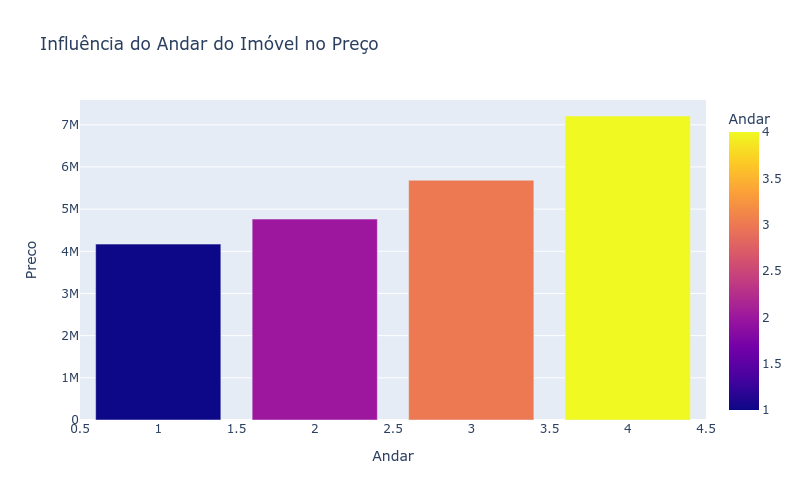

In [8]:
df = dados.groupby('NumAndares')['Preco'].mean().reset_index()

fig = px.bar(
    df,
    x='NumAndares',
    y='Preco',
    title='Influência do Andar do Imóvel no Preço',
    labels={'NumAndares': 'Andar'},
    color='NumAndares',
)
fig.update_layout(
    autosize=False,
    width=800,
    height=500
)
fig.show('png')

<h3>6.6 Preço por quantidade de quartos</h3>
<p>Com o aumento do número de quartos, geralmente observa-se uma elevação nos preços dos imóveis, refletindo uma maior área útil, assim como a versatilidade que quartos adicionais proporcionam. Esta tendência destaca a demanda por espaços maiores para acomodar famílias ou oferecer flexibilidade de uso. </p>
<p>O gráfico de barras exibe um aumento no preço do aluguel à medida que o número de quartos cresce de 1 para 4, mas mostra uma leve diminuição nos preços ao se passar para imóveis de 5 e 6 quartos. Essa tendência pode sugerir que existe um ponto ótimo de valorização ligado ao número de quartos, após o qual fatores adicionais podem afetar o preço, como a localização ou a demanda de mercado por imóveis maiores.</p>

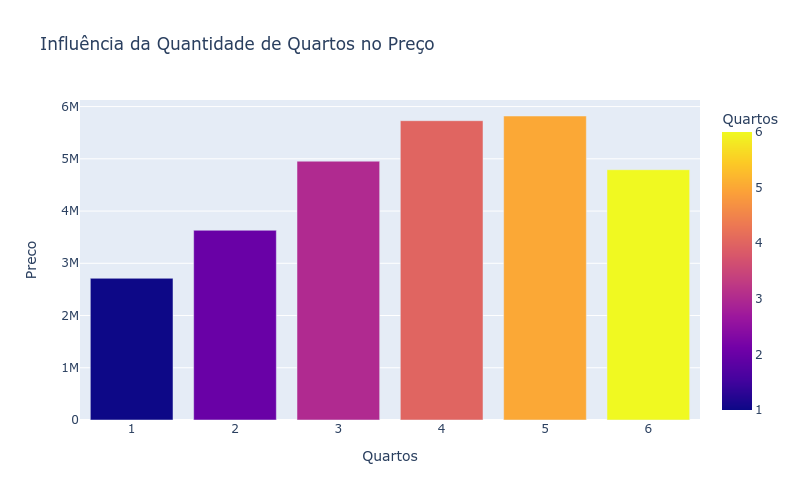

In [9]:
df = dados.groupby('Quartos')['Preco'].mean().reset_index()

fig = px.bar(
    df,
    x='Quartos',
    y='Preco',
    title='Influência da Quantidade de Quartos no Preço',
    color='Quartos',
)
fig.update_traces(textposition='inside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500
)
fig.show('png')

<h3>6.6.1 Preço por quartos de hóspedes</h3>
<p>A análise da relação entre quartos de hóspedes e a quantidade total de quartos em um imóvel foi considerada de importância secundária, pois a configuração do imóvel é frequentemente uma decisão do proprietário. Consequentemente, esta análise foi incorporada como um aspecto complementar dentro da seção "Preço por Quantidade de Quartos".</p>

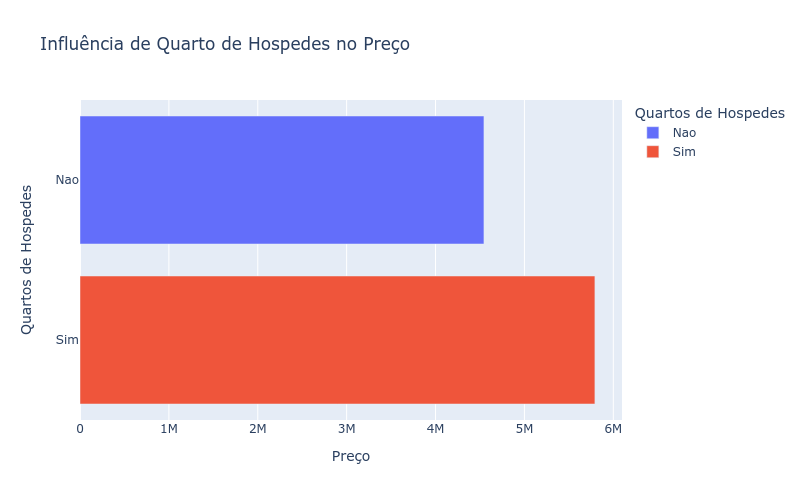

In [10]:
df = dados.groupby('QuartoHospedes')['Preco'].mean().reset_index()

fig = px.bar(
    df,
    x='Preco',
    y='QuartoHospedes',
    title='Influência de Quarto de Hospedes no Preço',
    labels={'QuartoHospedes': 'Quartos de Hospedes', 'Preco': 'Preço'},
    color='QuartoHospedes',
)
fig.update_layout(
    autosize=False,
    width=800,
    height=500
)
fig.show('png')

<h3>6.7 Preço por número de banheiros</h3>
<p>A quantidade de banheiros em um imóvel frequentemente influencia seu preço, pois banheiros adicionais são associados a maior conveniência, privacidade e luxo, tornando a propriedade mais atrativa e, portanto, mais cara.</p>
<p>O gráfico de barras exibe um aumento notável no preço do aluguel com o crescimento do número de banheiros, culminando em valores significativamente mais altos para imóveis com quatro banheiros, refletindo a alta valorização de imóveis com mais instalações sanitárias.</p>

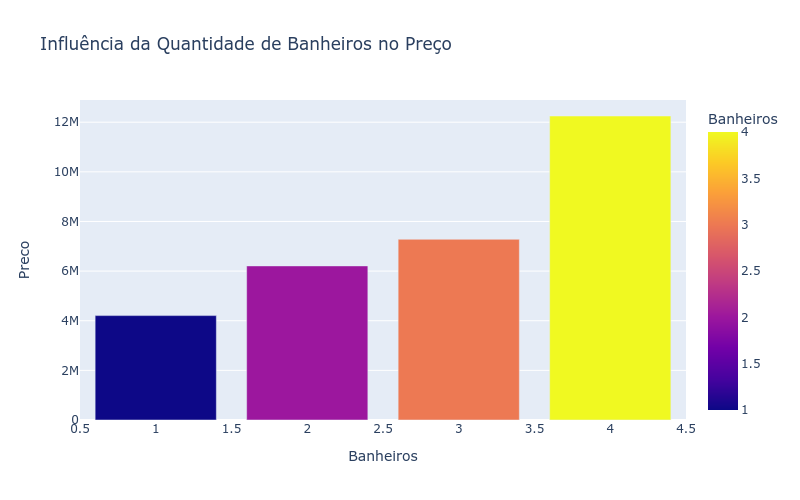

In [11]:
df = dados.groupby('Banheiros')['Preco'].mean().reset_index()

fig = px.bar(
    df,
    x='Banheiros',
    y='Preco',
    title='Influência da Quantidade de Banheiros no Preço',
    color='Banheiros',
)
fig.update_layout(
    autosize=False,
    width=800,
    height=500
)
fig.show('png')

<h3>6.8 Influência de Preço de Imóvel com Aquecimento de Água</h3>
<p>A presença de um sistema de aquecimento de água pode aumentar o preço de um imóvel, pois é um recurso que proporciona conforto adicional e é muitas vezes considerado uma comodidade de luxo. Este fator pode tornar a propriedade mais desejável e, por consequência, mais valiosa no mercado. Analisemos o nosso dataset.</p>
<p>O gráfico de barras mostra que imóveis com sistema de aquecimento de água têm um preço médio mais alto em comparação com aqueles sem aquecimento, evidenciando que esse atributo acrescenta valor ao imóvel. A diferença de preço destaca o aquecimento como um fator significativo de influência no mercado imobiliário, tornando propriedades com essa característica mais atraentes aos olhos dos consumidores e investidores.</p>

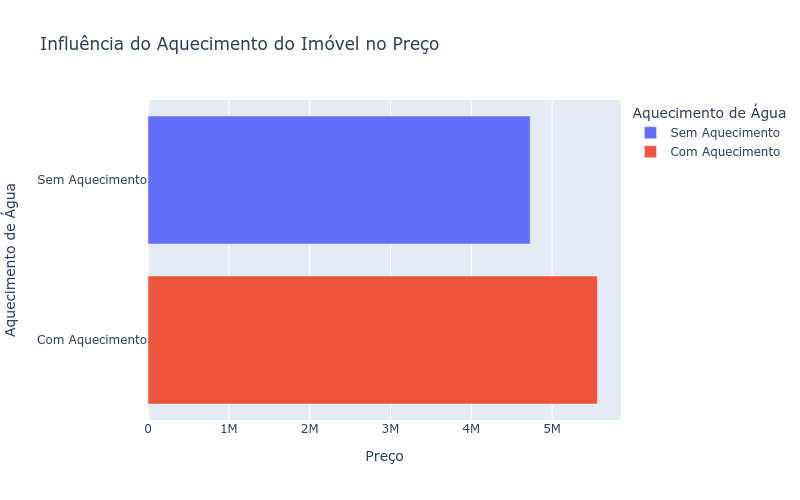

In [12]:
df = dados.groupby('AquecimentoAgua')['Preco'].mean().reset_index()

df['AquecimentoAgua'] = df['AquecimentoAgua'].replace(
    {'Nao': 'Sem Aquecimento', 'Sim': 'Com Aquecimento'}
)

fig = px.bar(
    df,
    y='AquecimentoAgua',
    x='Preco',
    title='Influência do Aquecimento do Imóvel no Preço',
    color='AquecimentoAgua',
    labels={'AquecimentoAgua': 'Aquecimento de Água', 'Preco': 'Preço'},
)
fig.update_layout(
    autosize=False,
    width=800,
    height=500
)
fig.show('png')

<h3>6.9 Influência da Vagas de Garagens no Preço do Imóvel</h3>
<p>Atualmente, as vagas de garagem agregam um valor considerável ao preço dos imóveis, principalmente em áreas urbanas densas onde o estacionamento é escasso e valorizado. A conveniência e segurança de ter vagas próprias são aspectos altamente desejáveis que justificam o aumento de preço. Este valor adicional é ainda mais pronunciado em cidades com infraestrutura de transporte limitada, onde a posse de um veículo é essencial.</p>
<p>O gráfico de barras demonstra um aumento progressivo no preço dos imóveis à medida que o número de vagas de garagem cresce, com um salto notável no preço quando se compara aos imóveis sem garagem com aqueles que oferecem uma vaga. A presença de duas ou três vagas mantém os preços em patamares elevados, reforçando a importância de vagas de estacionamento como um fator de valorização imobiliária.</p>

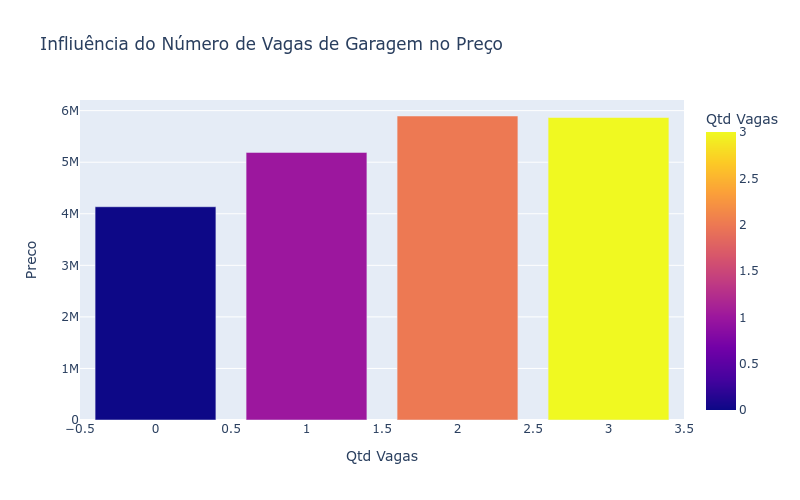

In [13]:
df = dados.groupby('VagasGaragem')['Preco'].mean().reset_index()

fig = px.bar(
    df,
    x='VagasGaragem',
    y='Preco',
    title='Infliuência do Número de Vagas de Garagem no Preço',
    labels={'VagasGaragem': 'Qtd Vagas'},
    color='VagasGaragem',
)
fig.update_layout(
    autosize=False,
    width=800,
    height=500
)
fig.show('png')

<h3>6.10 Preço do Imóvel mobiliado</h3>
<p>Imóveis mobiliados geralmente alcançam preços mais altos devido à conveniência e custo economizado em mobília, atraindo aqueles que buscam uma mudança prática ou imediata. Semi mobiliados oferecem um meio-termo flexível, podendo atrair um espectro mais amplo de compradores ou locatários. Imóveis não mobiliados costumam ter preços mais acessíveis, atraindo compradores que preferem personalizar o espaço ao seu gosto ou que já possuem mobília.</p>
<p>Um gráfico de boxplot, como o apresentado, é uma ferramenta gráfica que permite uma visualização detalhada da distribuição dos dados, indicando a mediana, quartis e potenciais outliers. Ele é especialmente útil para comparar estas medidas entre diferentes categorias.</p>
<p>Analisando o gráfico, observamos que imóveis mobiliados possuem uma mediana de preço mais alta em comparação aos semi-mobiliados e não mobiliados, o que sugere um valor agregado pela mobília incluída. A variação nos preços parece ser maior para imóveis mobiliados, como indicado pelos "bigodes" mais longos do boxplot e a presença de diversos outliers, refletindo uma ampla faixa de preços. Imóveis não mobiliados apresentam a menor mediana, o que pode indicar uma preferência de mercado por alguma mobília inclusa ou maior disposição para investir em imóveis que já tenham mobília.</p>

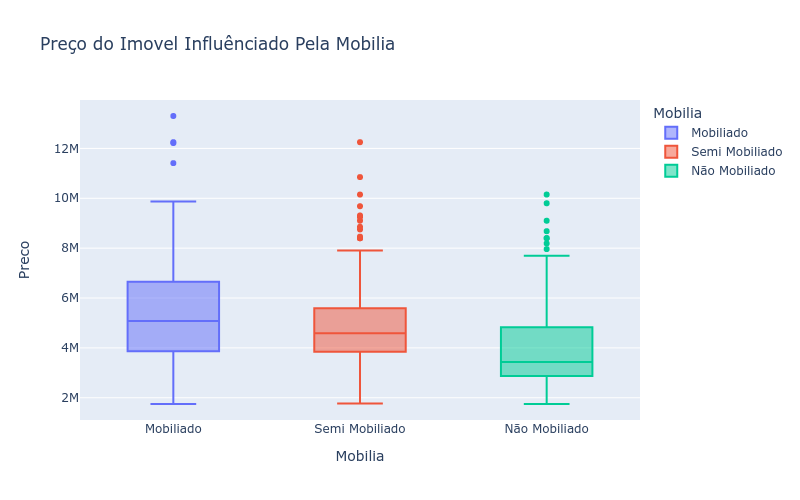

In [14]:
fig = px.box(
    dados,
    x='Mobilia',
    y='Preco',
    title='Preço do Imovel Influênciado Pela Mobilia',
    color='Mobilia',
)
fig.update_layout(
    autosize=False,
    width=800,
    height=500
)
fig.show('png')

<h3>6.11 Correlação das variáveis numéricas</h3>
<p>Por fim, decidimos utilizar um Mapa de Calor de Correlações para agrupar valores numéricos. O mapa de calor de correlação, utilizado para visualizar a força das relações entre variáveis numéricas. Ele mostra os coeficientes de correlação entre pares de variáveis, tipicamente medidos pelo coeficiente de Pearson, onde os valores próximos de 1 ou -1 indicam uma forte correlação positiva ou negativa, respectivamente, e valores próximos de 0 (zero) indicam pouca ou nenhuma correlação linear. As cores variam de acordo com a força da correlação, facilitando a identificação visual das relações mais fortes entre as variáveis.</p>
<p>O mapa de calor mostra a correlação entre o preço dos imóveis e suas características. A 'Área' apresenta a correlação mais forte com o preço (0.55), indicando que imóveis maiores tendem a ser mais caros. 'Banheiros' também têm uma correlação significativa com o preço (0.51), sugerindo que a quantidade de banheiros é um fator relevante no valor de um imóvel. Correlações entre preço e 'Quartos' (0.36), 'A Altura do Andar' (0.42) e 'Vagas na Garagem' (0.38) são moderadas, indicando que, embora esses fatores influenciem o preço, eles têm um impacto menor do que a área ou o número de banheiros. Esses números reforçam a importância do tamanho e das comodidades do imóvel na determinação de seu valor de mercado.</p>

In [15]:
df = dados[
    ['Preco', 'Area', 'Quartos', 'Banheiros', 'NumAndares', 'VagasGaragem']
]
correlacao = df.corr()
correlacao

,Preco,Area,Quartos,Banheiros,NumAndares,VagasGaragem
Preco,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
Area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
Quartos,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
Banheiros,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
NumAndares,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
VagasGaragem,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


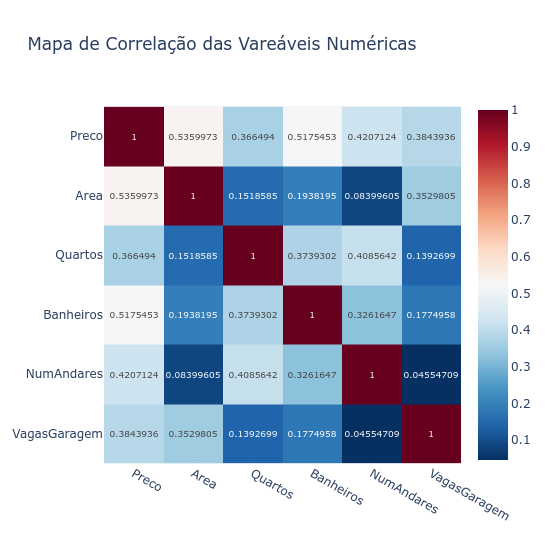

In [16]:
# Gráfico de correlação
fig = px.imshow(
    correlacao,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Mapa de Correlação das Vareáveis Numéricas',
    width=550,
    height=550,
)
fig.show('png')

<h3>6.12 Inferência sobre influência do quarto de hóspedes no preço</h3>
<p>Aplicando o teste de hipótese para identificarmos se a presença de quartos de hospedes influência no preço.</p>
<p>O resultado obtido indica que em 95% dos casos em que existe quarto de hóspedes o preço aumenta entre 850,177 e 1,646,525, mantendo todas as outras variáveis constantes. </p>

In [17]:
df = dados.copy()

df['QuartoHospedes'] = df['QuartoHospedes'].map({'Sim': 1, 'Nao': 0})

quarto_hospede = sm.add_constant(df['QuartoHospedes'])
modelo = sm.OLS(df['Preco'], quarto_hospede)
resultado = modelo.fit()

# Teste de hipótese
p_valor = resultado.pvalues['QuartoHospedes']
ic = resultado.conf_int().loc['QuartoHospedes']

# Imprimindo os resultados
if p_valor <= 0.05:
    print(
        f"""
    Hipótese nula rejeitada, o valor-p {p_valor:.10f}
    é extremamente pequeno. O intervalo de confiança é
    aproximadamente {ic[0]:.2f} | {ic[1]:.2f} em 95% das vezes.
    """
    )
else:
    print('A hipótese é nula, quartos de hospedes não influenciam no preço.')


    Hipótese nula rejeitada, o valor-p 0.0000000014
    é extremamente pequeno. O intervalo de confiança é
    aproximadamente 850177.69 | 1646524.87 em 95% das vezes.
    


<h3>6.13 Inferência sobre influência da quantidade quartos no preço</h3>
<p>Aplicando o teste de hipótese para identificarmos se a quantidade de quartos irá influenciar no preço.</p>
<p>O resultado do teste indica que em 95% dos casos em que o imóvel tem maiores quantidades de quartos o preço irá aumentar entre 730.020 e 1.127.556, mantendo todas as outras variáveis constantes.</p>

In [18]:
df = dados.copy()

quarto_hospede = sm.add_constant(df['Quartos'])
modelo = sm.OLS(df['Preco'], quarto_hospede)
resultado = modelo.fit()

# Teste de hipótese
p_valor = resultado.pvalues['Quartos']
ic = resultado.conf_int().loc['Quartos']

# Imprimindo os resultados
if p_valor <= 0.05:
    print(
        f"""
    Hipótese nula rejeitada, o valor-p {p_valor:.10f}
    é extremamente pequeno. O intervalo de confiança é
    aproximadamente {ic[0]:.2f} | {ic[1]:.2f} em 95% das vezes.
    """
    )
else:
    print('A hipótese é nula, quantidade de quartos não influenciam no preço.')


    Hipótese nula rejeitada, o valor-p 0.0000000000
    é extremamente pequeno. O intervalo de confiança é
    aproximadamente 730020.22 | 1127556.02 em 95% das vezes.
    


<h1>FIM</h1>